---

# Reconhecimento de Padrões - SIN492

## Projeto prático - Período de Verão 2024-0
### Sistemas de Informação, Universidade Federal de Viçosa - Campus Rio Paranaíba 

### Alunas:
 - Sabrina Dias Guimarães - 7639
 - Thalyta Maely Correa - 6392
 - Viviane Renizia Mendes Silva - 5209

### Professores:
 - Profª. Me. Larissa Ferreira Rodrigues Moreira
 - Prof. Me. Leandro Henrique Furtado P. Silva

---

## Reconhecimento de Padrões - Inteligência Artificial
O reconhecimento de padrões é um conceito fundamental em *machine learning*, e é essencial na criação de sistemas que podem aprender e tomar decisões com base em dados. Essa tecnologia permite que os computadores identifiquem padrões e regularidades em conjuntos de dados, possibilitando a classificação, a previsão e a identificação de tendências.

No reconhecimento de padrões, os algoritmos de aprendizado de máquina analisam e comparam dados para encontrar semelhanças ou diferenças. Isso pode ser aplicado em diversos campos, como reconhecimento facial, análise de sentimentos, diagnóstico médico e processamento de linguagem natural.


Os sistemas de reconhecimento de padrões são treinados usando grandes conjuntos de dados, nos quais aprendem a identificar correlações e características importantes. Uma vez treinados, esses sistemas podem aplicar esse conhecimento para interpretar novos dados, fazendo previsões ou identificando categorias relevantes.



| A eficácia do reconhecimento de padrões depende da qualidade e da quantidade dos dados utilizados no treinamento, assim como da precisão dos algoritmos. Com o avanço da inteligência artificial, o reconhecimento de padrões está se tornando cada vez mais sofisticado, permitindo aplicações mais complexas e precisas em uma variedade de indústrias. | ![Pattern Recognition](https://soothsayeranalytics.com/home-assets/img/solutions-images/pattern-recognition-image.jpg) |
| ----------------- | ------------------------------------------------------------ |
---

## Base de dados fornecida
A base de dados [dataset_SIN492.parquet](https://drive.google.com/file/d/1haNcYaDGCMbZAX3jmX_5pkkYraQ0Wdwa/view) possui 466 entradas e é composta inicialmente por 16 features (feature0, feature1, ..., feature15) e uma coluna target que corresponde a classe. A coluna target é *zero* indicando a não ocorrência do evento que deseja-se prever e *um* quando ha ocorrência do evento que deseja-se prever.

---

## Objetivos
- Praticar e aprimorar conceitos de Reconhecimento de Padrões.
- Solidificar conceitos de gerenciamento de projetos e sua implementacão (Full Stack).
- Induzir o aprendizado e pratica da escrita científica.
- Aprimorar as capacidades de programacão
  
---

## Atividades
- Analise exploratória dos dados.
- Preparacão dos dados.
- Modelagem.
- Avaliacão e Performance dos Modelos.
- Interpretação dos Resultados.
- Entrega do Projeto.

---

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

---
## Análise dos Dados

Antes de iniciar qualquer análise, é necessário verificar a estrutura do  *dataset*. Desse modo, serão analisadas as 5 primeiras entradas:

In [2]:
file_path = 'data/dataset_SIN492.parquet'

df = pd.read_parquet(file_path)

# Apenas salvando uma versão .csv do arquivo
df.to_csv("data/dataset_SIN492.csv")

df.head(5)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
266,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
236,50.0,23,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
274,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
208,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


Após verificar a estrutura do *dataset*, podemos observar que:

O conjunto possui várias colunas nomeadas desde 'feature0' até 'feature15', além de uma coluna 'target'. Os valores nessas colunas são numéricos e variam significativamente em magnitude, sugerindo que o conjunto de dados pode conter diferentes tipos de características (features), possivelmente de diferentes domínios ou métricas (medidas).


Precisamos entender o significado e a origem de cada característica para realizar uma análise mais aprofundada. Além disso, devemos realizar uma etapa de pré-processamento dos dados, como normalização ou padronização, principalmente considerando o objetivo de utilizar um modelo de aprendizado de máquina, que são modelos sensíveis à escala dos dados.

### **Quantidade de atributos (variáveis) e de entradas do conjunto de dados**

In [3]:
print(f'Entradas no DataFrame: {df.shape[0]} linhas no total')
print(f'Variáveis no DataFrame: {df.shape[1]} colunas no total')

Entradas no DataFrame: 466 linhas no total
Variáveis no DataFrame: 17 colunas no total


In [4]:
display(df.dtypes)

feature0     float64
feature1       int64
feature2     float64
feature3     float64
feature4     float64
feature5     float64
feature6       int64
feature7     float64
feature8     float64
feature9       int64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15      int64
target         int64
dtype: object

### **Porcentagem de valores ausentes no *dataset***

In [5]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Variáveis faltantes': missing_values, 'Porcentagem': missing_values_percentage})
missing_df.sort_values(by='Porcentagem', ascending=False)

,Variáveis faltantes,Porcentagem


Pode-se notar que, surpreendentemente, nenhuma variável no *dataset* apresenta valores ausentes!

### **Tipo de distribuição das variáveis** 

Será utilizado o **histograma** para identificar a distribuição das variáveis do *dataset*. 

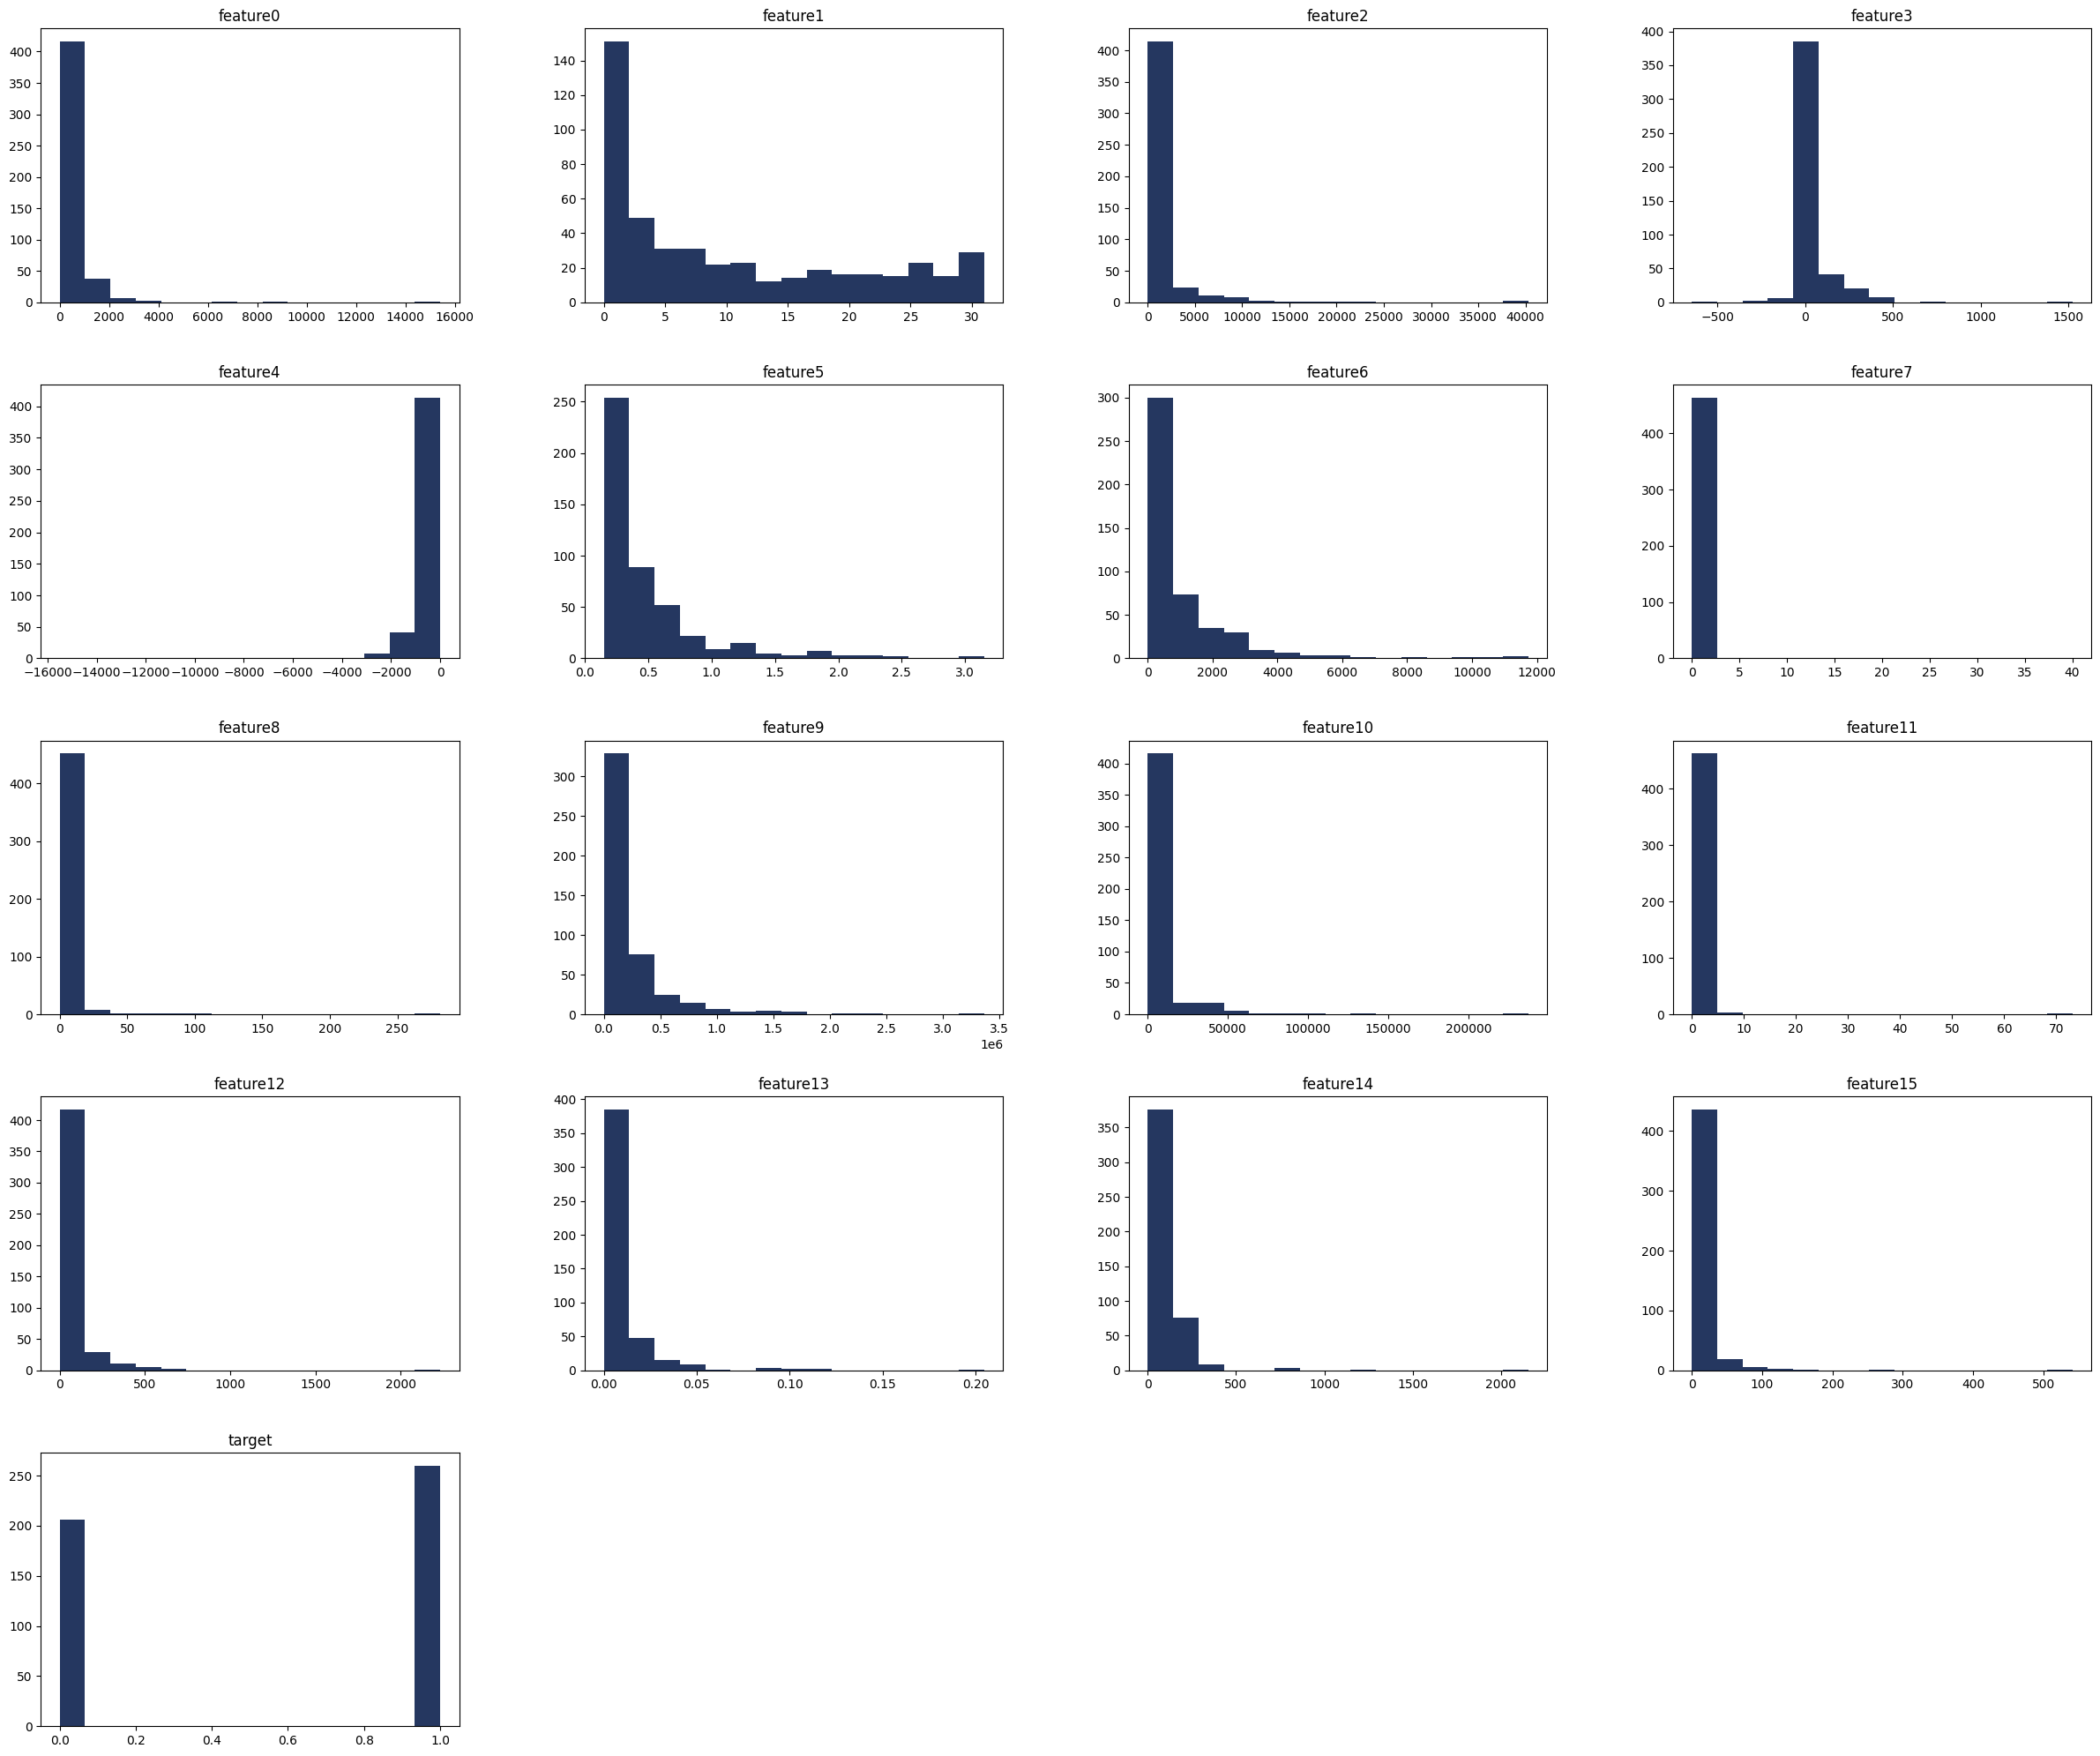

In [13]:
df.hist(bins=15, figsize=(30, 25), grid=False, color="#253760");

Com o histograma é possível notar que:

- feature0: Há uma pequena quantidade de valores muito mais altos que a maioria dos dados.
- feature3: Observa-se uma barra isolada à esquerda, sugerindo a presença de outliers negativos.
- feature4: Similar à feature0, parece haver uma concentração de valores em um extremo da distribuição.
- feature6: Apesar de a maioria dos dados estar concentrada no lado esquerdo, há valores espalhados até um valor muito alto, indicando possíveis outliers.
- feature10: A maioria dos valores está concentrada no início do histograma, mas há uma barra isolada mais à direita.
- feature12: Há uma concentração massiva de valores em um extremo e um valor isolado, indicando um possível outlier.

Porém, um histograma não é a melhor forma de verificar inconsistências, por isso, vamos avançar para outras análises.

#### **Verificação de Outliers** 
***Outliers*** podem influenciar a análise de dados, já que, por serem valores que se diferenciam significativamente do restante dos dados de um *dataset*, podem influenciar a análise para um viés que não represente a realidade da melhor forma. 

Vamos utilizar o método Z-score para realizar essas verificações. 
Para verificar outliers usando o escore Z,precisamos seguir ossseguintesspassoso:
1. 

Calcular a média (μ) e o desvio padrão (σ) de cada variáv
e2. l.
Calcular o escore Z para cada observax na variável usando a fórmula:
   çZ = (x - μ)/σ
�
Z= 
σ
(x−μ)
​
 
Identificar outliers: Observações com um escore Z acima de um certo limiar (comum usar valores como 3 ou -3) são consideradas outliers.